In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Modulo_Flavio as mod
import plt_conf as conf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


conf.general()  # cargando configuración general

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c','#0b5345','#154360']

lambda -> 0.1  Lambda ->  2.259158114323816e-12
numerica ->  [ 2.25862809e-12+0.j         -1.12902170e-12+2.37170825j
 -1.12946021e-12-2.37170825j]
analitico ->  2.2593038551121936e-12
[0.9000098799247113, 0.009994163984942983]


c:\Users\flavi\Dropbox\Flavio_Proyectos\Cubic Gravity (No se ha abandonado... aun)\Modulo_Flavio.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  f2 = (-(r**2*(3 - 3*r + Lambda*r**3 + 3*r*y)) - 72*lamb*(-1 + y)*y*y1 + 36*lamb*r*y1**2 + 12*lamb*r**2*y1**3)/(36.*lamb*r*y*(2 - 2*y + r*y1))
c:\Users\flavi\Dropbox\Flavio_Proyectos\Cubic Gravity (No se ha abandonado... aun)\Modulo_Flavio.py:56: RuntimeWarning: invalid value encountered in scalar multiply
  f2 = (-(r**2*(3 - 3*r + Lambda*r**3 + 3*r*y)) - 72*lamb*(-1 + y)*y*y1 + 36*lamb*r*y1**2 + 12*lamb*r**2*y1**3)/(36.*lamb*r*y*(2 - 2*y + r*y1))
c:\Users\flavi\Dropbox\Flavio_Proyectos\Cubic Gravity (No se ha abandonado... aun)\Modulo_Flavio.py:56: RuntimeWarning: invalid value encountered in scalar divide
  f2 = (-(r**2*(3 - 3*r + Lambda*r**3 + 3*r*y)) - 72*lamb*(-1 + y)*y*y1 + 36*lamb*r*y1**2 + 12*lamb*r**2*y1**3)/(36.*lamb*r*y*(2 - 2*y + r*y1))


Sch. radio ->  12111918875.72716
Horizon located in r = 0 Naked Singularity
lambda -> 0.05  Lambda ->  2.259158114323816e-12
numerica ->  [ 2.25858385e-12+0.j         -1.12887849e-12+3.35410197j
 -1.12949864e-12-3.35410197j]
analitico ->  2.2593038551121936e-12
[0.9000049399247132, 0.009997081984943028]


C:\Users\flavi\AppData\Local\Temp\ipykernel_3080\348993452.py:15: RuntimeWarning: divide by zero encountered in divide
  return SolCont(r) / r**2


Sch. radio ->  12111918875.72716
Horizon located in r =  0.4552411023769209
Valley point found at r = 0.810216204324087


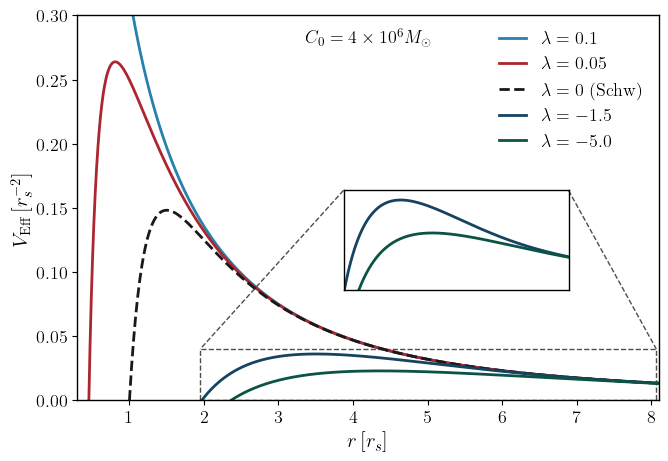

In [3]:
""""Potenciales Efectivos""" 
C0 = 4.1e6
Menos_Un0_Cinco=np.loadtxt("C:\\Users\\flavi\\OneDrive\\Escritorio\\Research\\CubicGravity\\Triangulos\\menos_uno_pto_cinco.dat") ##Datos Lambda Negativo -1.5
Menos_Cinco=np.loadtxt("C:\\Users\\flavi\\OneDrive\\Escritorio\\Research\\CubicGravity\\Triangulos\\menos_cinco.dat") ##Datos Lambda Negativo -1.5

def MaxEffPot(r, fun, dfun):
    r, fun, dfun = np.array(r), np.array(fun), np.array(dfun)
    condition = np.abs(r * dfun - 2 * fun) < 7e-4
    for idx, val in enumerate(condition):
        if val:
            print(f"Valley point found at r = {r[idx]}")
            return r[idx]

def EfectivePotencial(r, SolCont):
    return SolCont(r) / r**2

def plot_for_lambda_values(lambdas, Npt=50000, xmin=0, xmax=10):
    # Colores para las diferentes curvas
    col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
           '#f0a092', '#484f07', '#694d0c']
    
    
    for i, lamda in enumerate(lambdas):
        # Resolver el sistema para cada valor de lambda
        Sol, SolCont = mod.NumSol(C0, lamda, Npt=Npt, iter='d', xmin=xmin, xmax=xmax, 
                                   metodo='RK45', Rtol=1e-9, Atol=1e-10, info=True)

        # Encontrar el valor de rmax
        rmax = MaxEffPot(Sol.t, Sol.y[0], Sol.y[1])

        # Calcular el rango de r_val
        if len(Sol.t_events) > 0 and len(Sol.t_events[0]) > 0:
            r_val = np.linspace(Sol.t_events[0][0], Sol.t[0], 10000)
        else:
            r_val = np.linspace(0, Sol.t[0], 10000)
        
        # Graficar el potencial efectivo para cada lambda
        plt.plot(r_val, EfectivePotencial(r_val, SolCont), linestyle='-', color=col[i+ 2 % len(col)], 
                 label=rf'$\lambda={round(lamda,2)}$')
        
        # Graficar el valor de rmax
        #plt.plot(rmax, EfectivePotencial(np.array([rmax]), SolCont), 'ro', markersize=5, 
        #         label=r'$r_{Max}='+f'{round(rmax,2)}$')


# Llamar a la función con una lista de valores de lambda
lambdas = np.linspace(0.1,0.05,2)
#lambdas=[0.08,0.0825,0.85]

##Sch Funciones
r_vals_Sch=np.linspace(1,10,1000)
def SchPot(r):
    return 1/r**2*(1-1/r)

##Plotting 
fig,ax=plt.subplots(figsize=(7.5, 5))

Col05=-2
Col15=-1

plot_for_lambda_values(lambdas)
ax.plot(r_vals_Sch,SchPot(r_vals_Sch), color=col[0], label=r"$\lambda=0$ (Schw)",ls="--")
ax.plot(Menos_Un0_Cinco[:,0],(Menos_Un0_Cinco[:,1])/Menos_Un0_Cinco[:,0]**2,label=r"$\lambda=-1.5$",color=col[Col15])
ax.plot(Menos_Cinco[:,0],(Menos_Cinco[:,1])/Menos_Cinco[:,0]**2,label=r"$\lambda=-5.0$",color=col[Col05])




# Configuración de la gráfica   
ax.set_xlabel(r"$r\, [r_s]$")
ax.set_ylabel(r'$V_{\mathrm{Eff}}\,[r_s^{-2}]$')
ax.set_xlim(0.3,8.1)
ax.set_ylim(0,0.3)
ax.text(0.5, 0.92, r'$C_0=4 \times 10^6 M_{\odot}$', fontsize=13, 
         ha='center', va='bottom', transform=plt.gca().transAxes)
ax.legend(frameon=False, loc='upper right', fontsize=13,ncol=1)

#########Inset####################
left, bottom, width, height = [0.48, 0.33, 0.3, 0.2]  # posición y dimensiones del insert
ax_inset = fig.add_axes([left, bottom, width, height])
ax_inset.plot(Menos_Un0_Cinco[:,0],(Menos_Un0_Cinco[:,1])/(Menos_Un0_Cinco[:,0]**2),color=col[Col15])
ax_inset.plot(Menos_Cinco[:,0],(Menos_Cinco[:,1])/(Menos_Cinco[:,0]**2),color=col[Col05])
ax_inset.set_xlim(1.95,8.07)
ax_inset.set_ylim(0,0.04)
mark_inset(ax,ax_inset, loc1=1, loc2=2, ec="0.3", lw=1, ls='--')
ax_inset.set_xticks([])
ax_inset.set_yticks([])

plt.savefig('Effective_Potentials.pdf', format='pdf', bbox_inches='tight')

plt.show()
